In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

pd.set_option('display.max_columns', 25)

In [129]:
df_o = pd.read_csv('../data/datos_limpios.csv')
df_o.sample(2)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,price,discount,total_value,payment_method,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str
1208,1209,a,2022-01-20,0,fashion,1148,dress,0,80.62,0.07,0.0,NaN,NaN,east,20.0,f,mobile,11,NaN,safari,paid,no
350,351,b,2022-03-14,0,toys,1643,doll,0,81.26,NaN,0.0,NaN,NaN,north,26.0,m,mobile,8,NaN,safari,social,no


In [130]:
df = df_o.copy()

In [131]:
df.isnull().mean() * 100

user_id              0.00
group                0.00
visit_date           0.00
conversion           0.00
product_category     0.00
product_id           0.00
product_name         0.00
quantity             0.00
price                2.00
discount             2.00
total_value          0.00
payment_method      87.65
shipping_method     87.65
region               0.00
customer_age         2.00
customer_gender      0.00
device               0.00
session_duration     0.00
coupon_used         87.65
browser              0.00
referral_source      0.00
conversion_str       0.00
dtype: float64

In [132]:
df_nulos = df.loc[:,df.isnull().sum()>0]
df_nulos

,price,discount,payment_method,shipping_method,customer_age,coupon_used
0,41.27,0.29,NaN,NaN,64.0,NaN
1,45.45,0.22,NaN,NaN,19.0,NaN
2,64.81,0.08,NaN,NaN,69.0,NaN
3,189.40,0.08,credit_card,express,53.0,no
4,19.82,0.19,NaN,NaN,18.0,NaN
...,...,...,...,...,...,...
1995,177.49,0.20,NaN,NaN,25.0,NaN
1996,109.75,0.20,NaN,NaN,58.0,NaN
1997,236.05,0.15,NaN,NaN,62.0,NaN
1998,22.67,0.11,NaN,NaN,46.0,NaN


# Nulos categóricas

In [133]:
for col in df_nulos.select_dtypes(include='string').columns:
    print(col.upper())
    display(df[col].value_counts()/df.shape[0]*100)
    print('----------')
    

PAYMENT_METHOD


payment_method
bank_transfer       3.65
credit_card         3.35
paypal              2.85
cash_on_delivery    2.50
Name: count, dtype: float64

----------
SHIPPING_METHOD


shipping_method
express     4.50
same_day    4.10
standard    3.75
Name: count, dtype: float64

----------
COUPON_USED


coupon_used
no     6.60
yes    5.75
Name: count, dtype: float64

----------


Vamos a rellenar con una nueva categoría los nulos, hay demasiados, no se puede sustituir por la moda

In [134]:
def subplot_col_cat(dataframe):

     # Seleccionar columnas categóricas
    categorical_cols = dataframe.select_dtypes(include=['object', 'category']).columns

    if len(categorical_cols) == 0:
        
        return "No hay columnas categóricas en el DataFrame."
    
    # Configurar el tamaño de la figura
    num_cols = len(categorical_cols)
    rows = (num_cols + 2) // 3  # Calcular filas necesarias para 3 columnas por fila
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))
    axes = axes.flatten()  # Convertir los ejes a un array de una 1d plano para fácil iteración
    
    # Generar gráficos para cada columna categórica
    for i, col in enumerate(categorical_cols):
        sns.countplot(data=dataframe, x=col, ax=axes[i], hue=col, palette="tab10", legend=False)
        axes[i].set_title(f'Distribución de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')
        axes[i].tick_params(axis='x', rotation=90)  # Rotar etiquetas si es necesario

    # Eliminar ejes sobrantes si hay menos columnas que subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustar diseño
    plt.tight_layout()
    plt.show()

/var/folders/0t/7q5wxs1s157_06nj_h8s16rw0000gp/T/ipykernel_28607/1746954624.py:4: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = dataframe.select_dtypes(include=['object', 'category']).columns


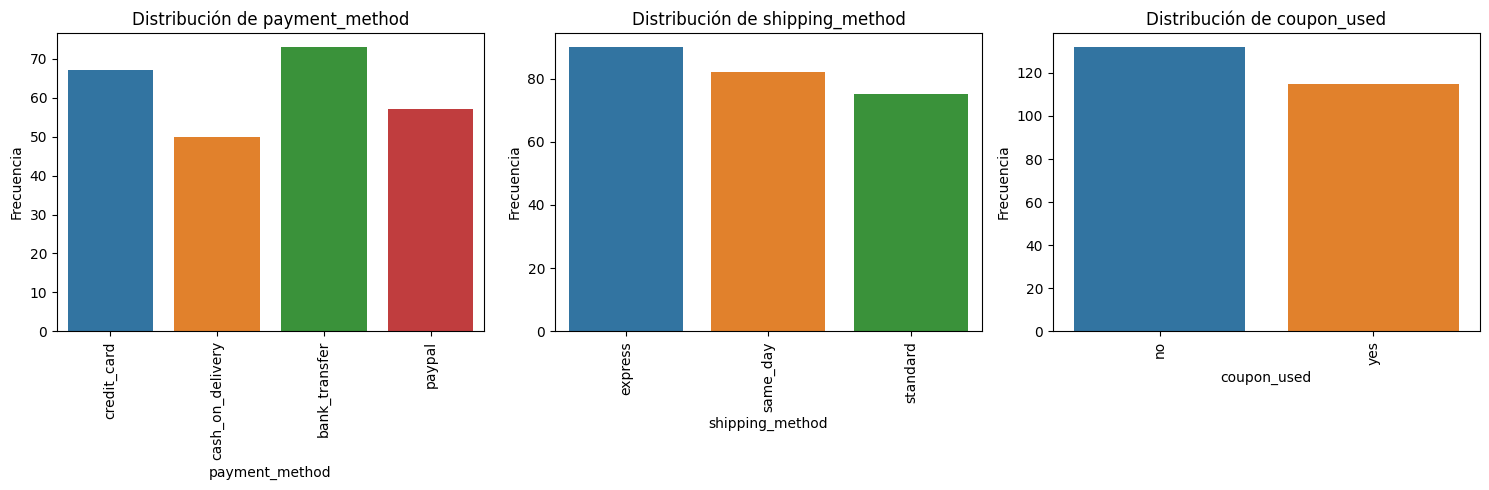

In [135]:
subplot_col_cat (df_nulos)

In [136]:
df_nulos.isnull().mean() * 100

price               2.00
discount            2.00
payment_method     87.65
shipping_method    87.65
customer_age        2.00
coupon_used        87.65
dtype: float64

In [137]:
df.sample(5)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,price,discount,total_value,payment_method,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str
106,107,a,2022-01-15,0,beauty,1886,perfume,0,73.29,0.19,0.00,NaN,NaN,north,63.0,other,desktop,5,NaN,edge,email,no
546,547,a,2022-03-08,1,beauty,1557,perfume,2,133.29,0.30,186.61,credit_card,standard,north,36.0,m,tablet,20,yes,chrome,email,yes
1046,1047,a,2022-01-04,0,home,1955,lamp,0,317.19,0.21,0.00,NaN,NaN,north,53.0,m,tablet,15,NaN,edge,paid,no
1188,1189,a,2022-02-01,0,toys,1603,doll,0,59.07,0.05,0.00,NaN,NaN,central,NaN,f,desktop,15,NaN,other,social,no
934,935,a,2022-03-23,0,home,1355,lamp,0,455.11,0.05,0.00,NaN,NaN,west,62.0,f,desktop,23,NaN,chrome,organic,no


In [138]:
df_nocompra = df[df['conversion']==0]
df_nocompra.isnull().mean()*100

user_id               0.000000
group                 0.000000
visit_date            0.000000
conversion            0.000000
product_category      0.000000
product_id            0.000000
product_name          0.000000
quantity              0.000000
price                 1.711352
discount              1.939532
total_value           0.000000
payment_method      100.000000
shipping_method     100.000000
region                0.000000
customer_age          2.110667
customer_gender       0.000000
device                0.000000
session_duration      0.000000
coupon_used         100.000000
browser               0.000000
referral_source       0.000000
conversion_str        0.000000
dtype: float64

In [139]:
df_compra = df[df['conversion']==1]
df_compra.isnull().mean()*100

user_id             0.000000
group               0.000000
visit_date          0.000000
conversion          0.000000
product_category    0.000000
product_id          0.000000
product_name        0.000000
quantity            0.000000
price               4.048583
discount            2.429150
total_value         0.000000
payment_method      0.000000
shipping_method     0.000000
region              0.000000
customer_age        1.214575
customer_gender     0.000000
device              0.000000
session_duration    0.000000
coupon_used         0.000000
browser             0.000000
referral_source     0.000000
conversion_str      0.000000
dtype: float64

Se ha comprobado que los nulos de las columnas categóricas son debido a que no se ha realizado la compr, por lo tanto no tienen método de pago, método de transporte ni se ha utilizado ningún cupón

In [140]:
df.loc[:, df.select_dtypes(include='string').columns] = df.select_dtypes(include='string').fillna('no_conversion')
df.isnull().mean() * 100

user_id             0.0
group               0.0
visit_date          0.0
conversion          0.0
product_category    0.0
product_id          0.0
product_name        0.0
quantity            0.0
price               2.0
discount            2.0
total_value         0.0
payment_method      0.0
shipping_method     0.0
region              0.0
customer_age        2.0
customer_gender     0.0
device              0.0
session_duration    0.0
coupon_used         0.0
browser             0.0
referral_source     0.0
conversion_str      0.0
dtype: float64

# Outliers

In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2000.0,1000.500000,577.494589,1.00,500.7500,1000.500,1500.250,2000.00
conversion,2000.0,0.123500,0.329093,0.00,0.0000,0.000,0.000,1.00
product_id,2000.0,1501.560000,287.188372,1000.00,1256.0000,1510.500,1746.500,1998.00
quantity,2000.0,0.371000,1.096339,0.00,0.0000,0.000,0.000,5.00
price,1960.0,184.572138,211.981538,5.02,46.0925,102.465,236.155,998.88
discount,1960.0,0.150224,0.086591,0.00,0.0800,0.150,0.220,0.30
total_value,2000.0,51.754830,234.575099,0.00,0.0000,0.000,0.000,2904.07
customer_age,1960.0,43.156633,15.361675,18.00,30.0000,42.000,56.000,70.00
session_duration,2000.0,15.633500,8.692235,1.00,8.0000,16.000,23.000,30.00


In [142]:
def subplot_col_num (dataframe):


    col_nums = dataframe.select_dtypes(include= 'number').columns
    num_graph = len(col_nums)

    num_rows = (num_graph +2 )//2


    fig, axes = plt.subplots(num_graph, 2, figsize=(15, num_rows*5))

    for i, col in enumerate(col_nums):

        sns.histplot(data=dataframe, x=col, ax=axes[i,0], bins=200)
        axes[i,0].set_title(f'Distribución de {col}')
        axes[i,0].set_xlabel(col)
        axes[i,0].set_ylabel('Frecuencia')

        sns.boxplot(data=dataframe, x=col, ax = axes[i,1])
        axes[i,1].set_title(f'Boxplot de {col}')

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])


    plt.tight_layout()
    plt.show()

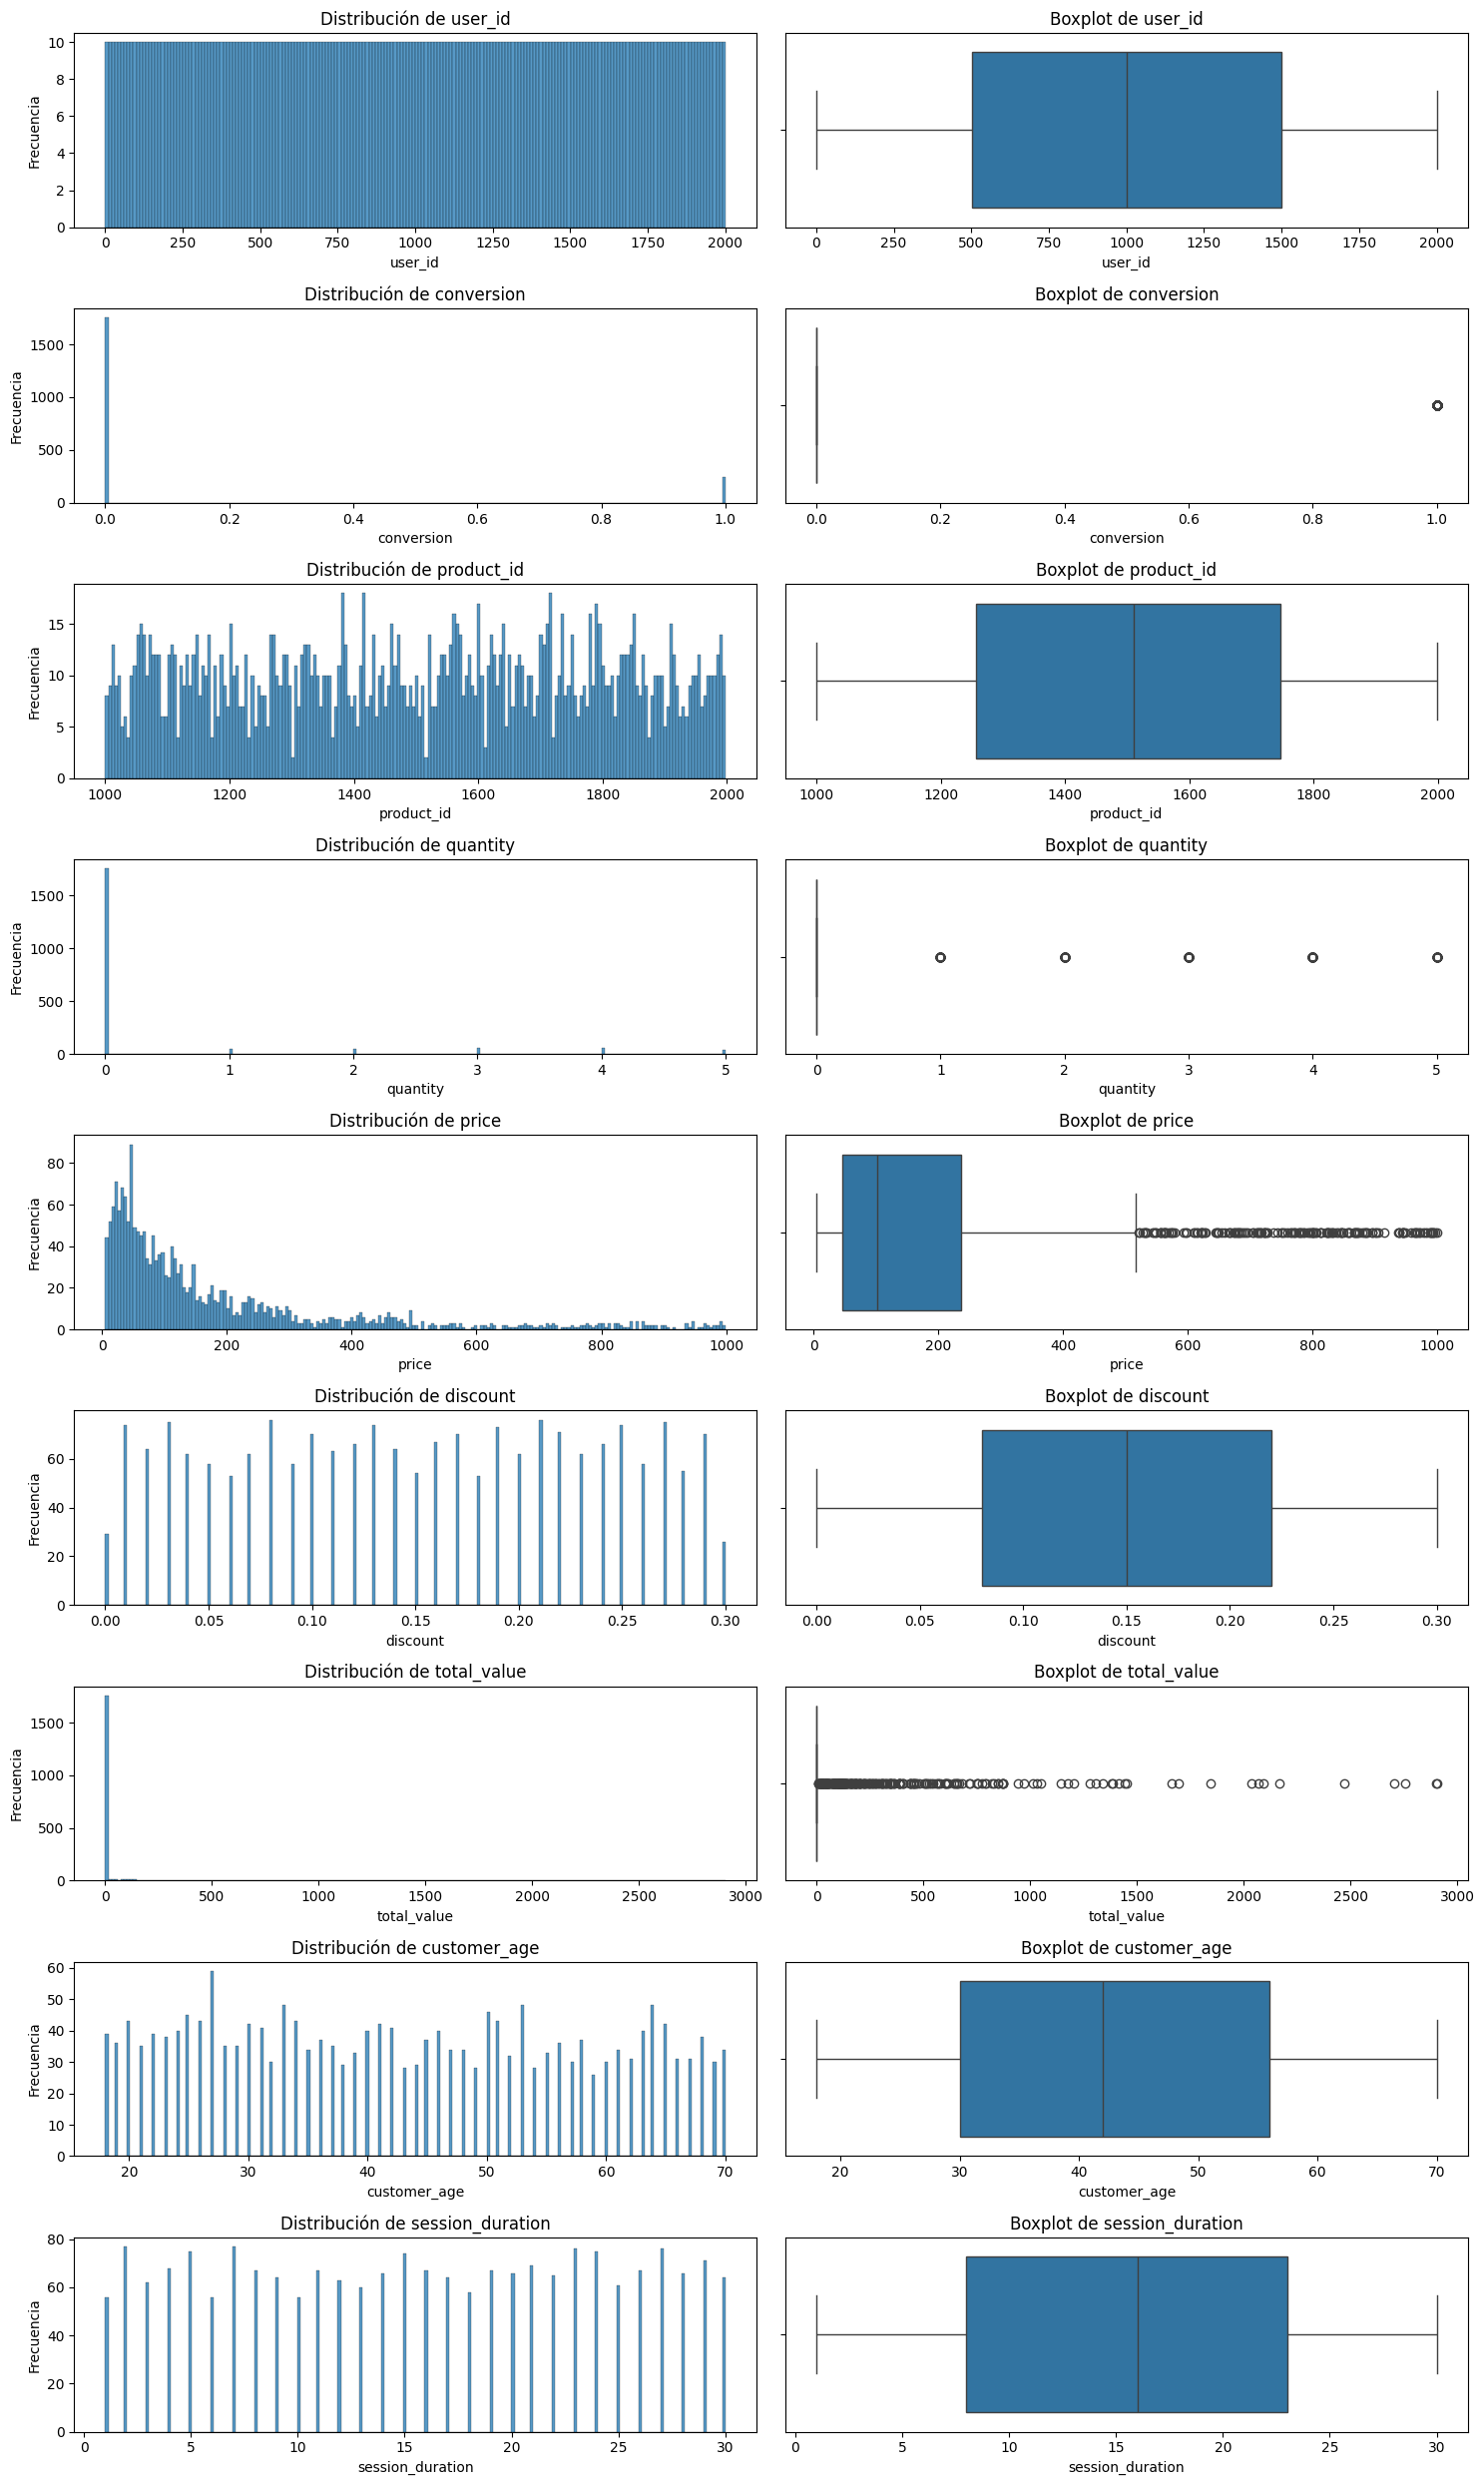

In [143]:
subplot_col_num(df)

tiene outliers:
- price 
- total_value

In [144]:
def calculo_outliers (df, cols):
    for col in cols:
        q_75 = df[col].quantile(0.75)
        q_25 = df[col].quantile(0.25)
        rango_itq = q_75-q_25
        inferior = q_25 - (rango_itq*1.5)
        superior = q_75 + (rango_itq*1.5)

        outliers = df[(df[col]< inferior) | (df[col] > superior)]
        num_outliers = len(outliers)

        per_outliers = num_outliers/df.shape[0]*100

        print(f'En la columna {col.upper()} tenemos un total de {num_outliers} outliers, lo que representa un {per_outliers}% del total')

In [145]:
calculo_outliers (df, ['price', 'total_value'])

En la columna PRICE tenemos un total de 161 outliers, lo que representa un 8.05% del total
En la columna TOTAL_VALUE tenemos un total de 247 outliers, lo que representa un 12.35% del total


# Nulos columnas numéricas

In [146]:
df_nulos.select_dtypes(include='number').isnull().mean()*100

price           2.0
discount        2.0
customer_age    2.0
dtype: float64

In [147]:
df_nulos.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1960.0,184.572138,211.981538,5.02,46.0925,102.465,236.155,998.88
discount,1960.0,0.150224,0.086591,0.00,0.0800,0.150,0.220,0.30
customer_age,1960.0,43.156633,15.361675,18.00,30.0000,42.000,56.000,70.00


discount lo vamos a sustituir con la media,
customer_age con la mediana

In [148]:
df_filled_simple = df.fillna({
    'discount': df['discount'].mean(),
    'customer_age': df['customer_age'].median()
})

In [149]:
def imputar_iterative(dataframe, lista_columas):
    iter_imputer = IterativeImputer(max_iter=50, 
                                random_state=42)
    data_imputed = iter_imputer.fit_transform(dataframe[lista_columas])
    new_col = [col + "_iterative" for col in lista_columas]
    dataframe[new_col] = data_imputed
    return dataframe

In [150]:
def imputar_knn(dataframe, lista_columas):
    knn_imputer = KNNImputer(n_neighbors=5)
    data_imputed = knn_imputer.fit_transform(dataframe[lista_columas])
    new_col = [col + "_knn" for col in lista_columas]
    dataframe[new_col] = data_imputed
    return dataframe

In [151]:
df_filled_simple = imputar_iterative(df_filled_simple, ['price'])
df_filled_simple.sample(5)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,price,discount,total_value,payment_method,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str,price_iterative
1498,1499,a,2022-02-08,0,toys,1381,doll,0,30.75,0.30,0.0,no_conversion,no_conversion,north,29.0,other,desktop,14,no_conversion,firefox,organic,no,30.75
381,382,b,2022-03-12,0,sports,1319,football,0,38.47,0.06,0.0,no_conversion,no_conversion,south,70.0,f,desktop,21,no_conversion,other,organic,no,38.47
1188,1189,a,2022-02-01,0,toys,1603,doll,0,59.07,0.05,0.0,no_conversion,no_conversion,central,42.0,f,desktop,15,no_conversion,other,social,no,59.07
1860,1861,b,2022-01-09,0,beauty,1511,lotion,0,25.37,0.17,0.0,no_conversion,no_conversion,north,48.0,m,desktop,19,no_conversion,chrome,organic,no,25.37
1717,1718,b,2022-02-06,0,electronics,1512,camera,0,966.85,0.14,0.0,no_conversion,no_conversion,east,22.0,m,desktop,21,no_conversion,other,email,no,966.85


In [152]:
df_filled_simple = imputar_knn(df_filled_simple, ['price'])
df_filled_simple.sample()

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,price,discount,total_value,payment_method,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str,price_iterative,price_knn
1446,1447,b,2022-01-13,0,home,1745,sofa,0,377.76,0.27,0.0,no_conversion,no_conversion,north,18.0,f,desktop,21,no_conversion,edge,paid,no,377.76,377.76


In [153]:
df_filled_simple.isnull().sum()

user_id              0
group                0
visit_date           0
conversion           0
product_category     0
product_id           0
product_name         0
quantity             0
price               40
discount             0
total_value          0
payment_method       0
shipping_method      0
region               0
customer_age         0
customer_gender      0
device               0
session_duration     0
coupon_used          0
browser              0
referral_source      0
conversion_str       0
price_iterative      0
price_knn            0
dtype: int64

deberíamos quedarnos con el que más se parezca a price, pero en este caso ambos son idénticos

In [154]:
df_filled_simple[['price', 'price_iterative', 'price_knn']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,1960.0,184.572138,211.981538,5.02,46.0925,102.465,236.1550,998.88
price_iterative,2000.0,184.572138,209.849945,5.02,46.7975,106.810,231.7425,998.88
price_knn,2000.0,184.572138,209.849945,5.02,46.7975,106.810,231.7425,998.88


In [155]:
df_filled_simple.drop(columns=['price', 'price_iterative'], inplace=True)

In [156]:
df_filled_simple.sample(5)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,discount,total_value,payment_method,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str,price_knn
1697,1698,a,2022-03-02,0,home,1050,table,0,0.26,0.0,no_conversion,no_conversion,north,65.0,m,desktop,15,no_conversion,chrome,paid,no,125.70
1042,1043,a,2022-03-20,0,beauty,1014,perfume,0,0.27,0.0,no_conversion,no_conversion,east,22.0,f,tablet,3,no_conversion,other,social,no,52.75
800,801,b,2022-02-03,0,books,1849,biography,0,0.04,0.0,no_conversion,no_conversion,north,58.0,f,tablet,8,no_conversion,edge,social,no,31.20
333,334,a,2022-01-16,0,home,1327,lamp,0,0.16,0.0,no_conversion,no_conversion,east,42.0,m,mobile,25,no_conversion,edge,paid,no,103.92
1664,1665,b,2022-03-12,0,books,1825,novel,0,0.13,0.0,no_conversion,no_conversion,central,28.0,m,mobile,7,no_conversion,other,organic,no,20.57


In [157]:
df_filled_simple.isnull().sum()

user_id             0
group               0
visit_date          0
conversion          0
product_category    0
product_id          0
product_name        0
quantity            0
discount            0
total_value         0
payment_method      0
shipping_method     0
region              0
customer_age        0
customer_gender     0
device              0
session_duration    0
coupon_used         0
browser             0
referral_source     0
conversion_str      0
price_knn           0
dtype: int64

In [158]:
df_filled_simple.to_csv('../data/data_limpio_nonulos.csv', index=False)